In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

In [2]:
data_path = './flowers/'
batch_size = 32
target_size = (64, 64)

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [4]:

X_train = train_datagen.flow_from_directory(data_path,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            subset="training",
                                            class_mode='categorical')



X_test = test_datagen.flow_from_directory(data_path,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          subset="validation",
                                          class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [6]:
model = Sequential()

In [7]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, steps_per_epoch=100, epochs=20)

Epoch 1/20
100/100 [==============================] - 8s 74ms/step - loss: 0.8592 - accuracy: 0.6693
Epoch 2/20
100/100 [==============================] - 8s 75ms/step - loss: 0.8127 - accuracy: 0.6841
Epoch 3/20
100/100 [==============================] - 7s 75ms/step - loss: 0.7724 - accuracy: 0.7009
Epoch 4/20
100/100 [==============================] - 7s 73ms/step - loss: 0.7421 - accuracy: 0.7198
Epoch 5/20
100/100 [==============================] - 8s 78ms/step - loss: 0.7266 - accuracy: 0.7204
Epoch 6/20
100/100 [==============================] - 8s 75ms/step - loss: 0.7393 - accuracy: 0.7160
Epoch 7/20
100/100 [==============================] - 8s 82ms/step - loss: 0.7395 - accuracy: 0.7163
Epoch 8/20
100/100 [==============================] - 8s 80ms/step - loss: 0.6993 - accuracy: 0.7251
Epoch 9/20
100/100 [==============================] - 8s 76ms/step - loss: 0.6899 - accuracy: 0.7444
Epoch 10/20
100/100 [==============================] - 8s 76ms/step - loss: 0.6781 - accura

In [13]:
model.save("model.h5")

In [17]:
def predict():
    img = image.load_img("./rose.jpg", target_size=target_size)
    x = image.img_to_array(img)
    x = tf.expand_dims(x,0)

    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    
    pred = model.predict(x)
    prediction = labels[np.argmax(pred[0])]
    
    print(f'The given image is a {prediction}')
    plt.imshow(plt.imread("./rose.jpg"))
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 22ms/step
The given image is a rose


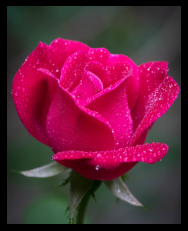

In [18]:
predict()